In [251]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [267]:
data = pd.read_csv('IPL 2022.csv')

In [268]:
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [172]:
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [11]:
# Number of matches won by each team in IPL 2022

In [171]:
won = data.groupby('match_winner')['match_winner'].value_counts().reset_index(name='No._of_Wins')
won

,match_winner,No._of_Wins
0,Banglore,9
1,Chennai,4
2,Delhi,7
3,Gujarat,12
4,Hyderabad,6
5,Kolkata,6
6,Lucknow,9
7,Mumbai,4
8,Punjab,7
9,Rajasthan,10


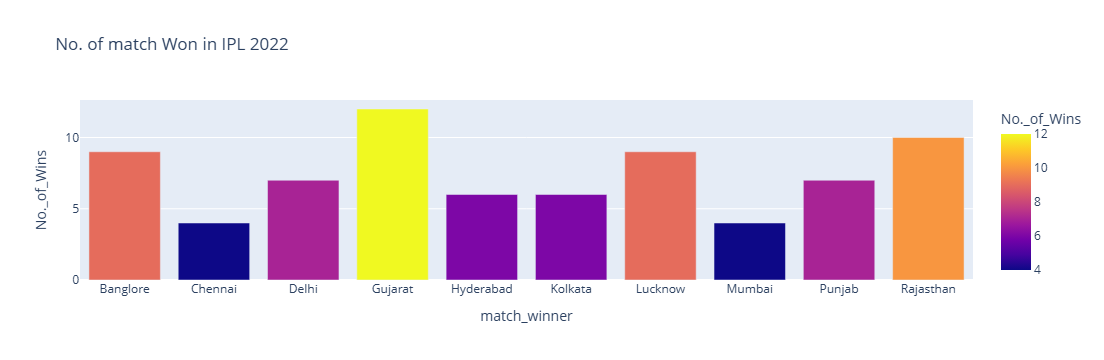

In [173]:
won = data.groupby('match_winner')['match_winner'].value_counts().reset_index(name='No._of_Wins')
fig = px.bar(won,x='match_winner',y = 'No._of_Wins',title ='No. of match Won in IPL 2022' ,color = 'No._of_Wins')
fig.show()

In [144]:
# Number of matches won by defending and Chasing 

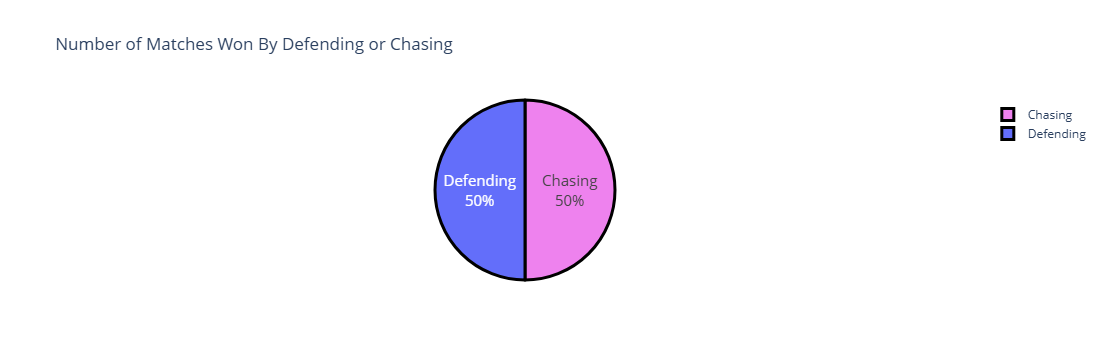

In [231]:
data["won_by"] = data["won_by"].map({"Wickets" : 'Chasing',"Runs" : "Defending"})

won_by = data["won_by"].value_counts()
counts = won_by.values
label = won_by.index
colors = ['violet','hot_pink']

fig = go.Figure(data=[go.Pie(labels= label, values = counts)])
fig.update_layout(title_text='Number of Matches Won By Defending or Chasing')
fig.update_traces(hoverinfo='label+percent',textinfo='label+percent',
                  textfont_size =15,
                  marker =dict(colors=colors,line = dict(color='black',width =3)))
fig.show()

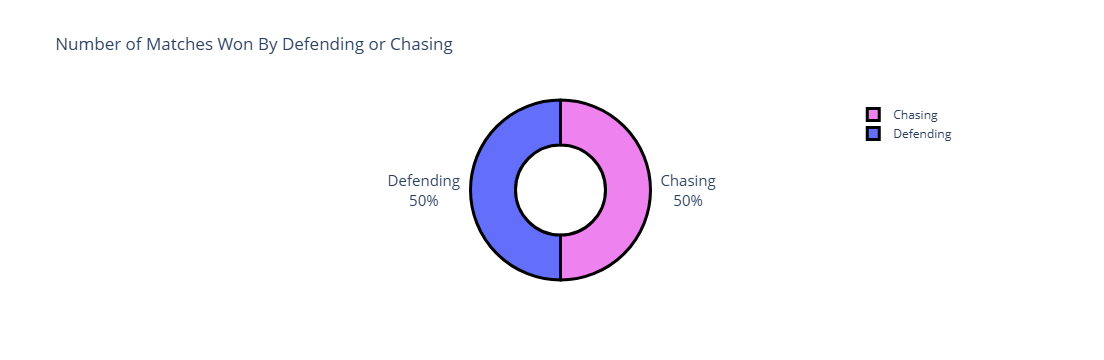

In [269]:
data["won_by"] = data["won_by"].map({"Wickets": 'Chasing', "Runs": "Defending"})

# Create a pie chart with Plotly Express
fig = px.pie(data, names='won_by', title='Number of Matches Won By Defending or Chasing',color ='won_by',
            color_discrete_map={'Chasing': 'violet', 'Defending': 'hot_pink'},
             hole=0.5)

# Customize hover and text info
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=15,
               marker=dict(line=dict(color='black', width=3)))

fig.show()

In [270]:
# Best Bowling in No. of Matches

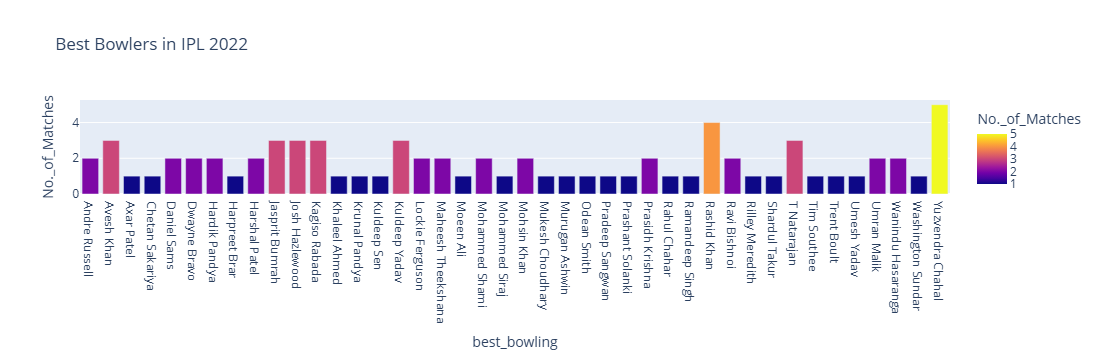

In [277]:
won = data.groupby('best_bowling')['best_bowling'].value_counts().reset_index(name='No._of_Matches')
fig = px.bar(won,x='best_bowling',y = 'No._of_Matches',title ='Best Bowlers in IPL 2022' ,color = 'No._of_Matches')
fig.show()

In [278]:
# Player of the match

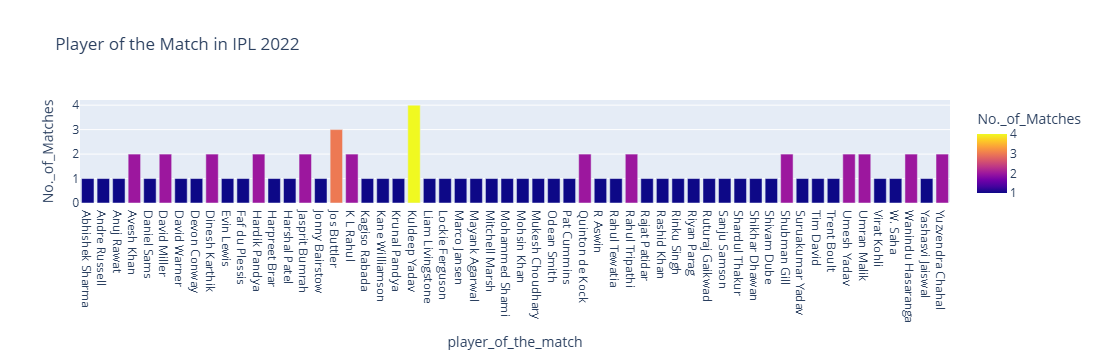

In [281]:
match = data.groupby('player_of_the_match')['player_of_the_match'].value_counts().reset_index(name ='No._of_Matches')
fig = px.bar(match,x='player_of_the_match',y='No._of_Matches',title ='Player of the Match in IPL 2022',color = 'No._of_Matches')
fig.show()

In [282]:
# Top Scorers with their Top Scores

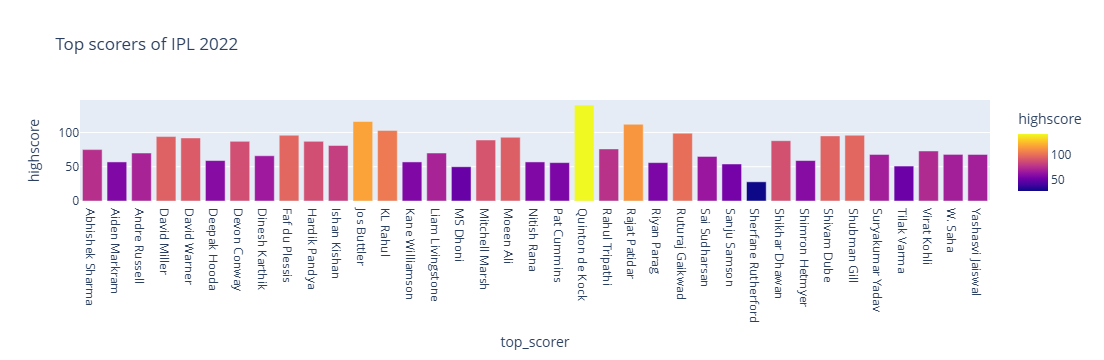

In [296]:
match = data.groupby('top_scorer')['highscore'].max().reset_index()
fig = px.bar(match,x='top_scorer',y='highscore',title='Top scorers of IPL 2022',color = 'highscore')
fig.show()